In [6]:
import msprime

core_tree = msprime.sim_ancestry(
                samples=4,
                sequence_length=1,
                ploidy=1,
                recombination_rate=0,
                gene_conversion_rate=0,
                gene_conversion_tract_length=1,  # One gene
            )
    
ce_from_nwk = core_tree.first().newick()

AVLTree({0.0: 0, 5.0: -1})
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]


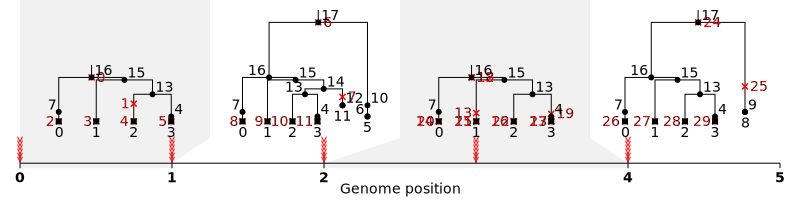

In [38]:
import gene_model
import numpy as np

mts = gene_model.gene_model(
        theta=1,
        rho=0.01,
        gene_conversion_rate=0,
        recombination_rate=0,
        hgt_rate=0.2,
        num_samples=4,
        ce_from_nwk=ce_from_nwk,
        num_sites=5,
        double_site_relocation=False,
        ancestral_genes=False,
)
    
gene_absence_presence_matrix = []

# Add the genes present in the root of the core tree:

for var in mts.variants():
    if not var.alleles == ('present',): # At least one loss in the leaves
         gene_absence_presence_matrix.append(var.genotypes)
    else: # No losses in the leaves
        gene_absence_presence_matrix.append(np.ones(4))

print(np.array(gene_absence_presence_matrix))

mts.draw_svg()

In [36]:
mts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,9,0.62172440,absent,-1,b'\x01'
1,0,1,0.06508755,present,-1,b'\x00'
2,0,0,0.00000000,absent,-1,b'\x01'
3,0,1,0.00000000,present,1,b'\x01'
4,0,2,0.00000000,absent,-1,b'\x01'
5,0,3,0.00000000,absent,-1,b'\x01'
6,1,9,0.62172440,absent,-1,b'\x01'
7,1,3,0.02322332,present,-1,b'\x00'
8,1,0,0.00000000,absent,-1,b'\x01'
9,1,1,0.00000000,absent,-1,b'\x01'
